In [18]:
!pip install matplotlib

In [19]:
!pip install pandas

In [20]:
!pip install gridsim

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
%matplotlib inline

In [23]:
pd.read_csv('D:\LKTI\Folder Baru\Data_Sistem_Norwegia.csv')

,No;Parameter;Nilai + Satuan;Keterangan
1;Demand listrik;132,98 TWh;Permintaan tahunan
2;Kapasitas termal;1.600,00 MW;Kapasitas sistem CHP
3;Generasi termal;3,37 TWh;Total energi CHP
4;Kapasitas condensing;0 MW;Tidak ada pembangkit,NaN
5;Kapasitas CHP;~1.600 MW;CHP terpasang,NaN
6;Listrik CHP;1,71 TWh;Produksi listrik
7;Panas CHP;1,66 TWh;Produksi panas
8;Rasio panas/listrik;0,97;Rasio efisiensi
9;Share CHP;1,29 %;Proporsi CHP nasional
10;Share condensing;0 %;Tidak ada,NaN


In [27]:
import pandas as pd
df = pd.read_csv('D:\LKTI\Folder Baru\Data_Sistem_Norwegia.csv', sep=';')
df.head()

,No,Parameter,Nilai + Satuan,Keterangan
0,1,Demand listrik,"132,98 TWh",Permintaan tahunan
1,2,Kapasitas termal,"1.600,00 MW",Kapasitas sistem CHP
2,3,Generasi termal,"3,37 TWh",Total energi CHP
3,4,Kapasitas condensing,0 MW,Tidak ada pembangkit
4,5,Kapasitas CHP,~1.600 MW,CHP terpasang


In [32]:
print(df.columns)
df.head()

Index(['No', 'Parameter', 'Nilai + Satuan', 'Keterangan', 'Nilai_cleaned'], dtype='object')


,No,Parameter,Nilai + Satuan,Keterangan,Nilai_cleaned
0,1,Demand listrik,"132,98 TWh",Permintaan tahunan,132.98
1,2,Kapasitas termal,"1.600,00 MW",Kapasitas sistem CHP,1600.00
2,3,Generasi termal,"3,37 TWh",Total energi CHP,3.37
3,4,Kapasitas condensing,0 MW,Tidak ada pembangkit,0.00
4,5,Kapasitas CHP,~1.600 MW,CHP terpasang,1600.00


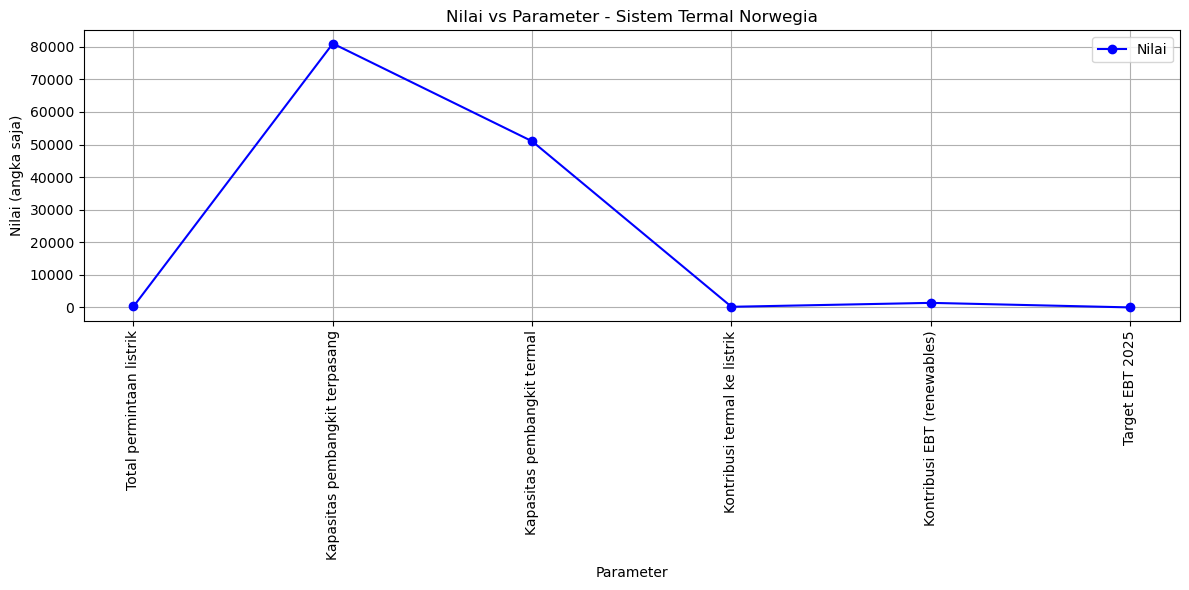

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Bersihkan kolom 'Nilai + Satuan'
df['Nilai_cleaned'] = (
    df['Nilai + Satuan']
    .astype(str)
    .str.replace(r'[^\d,.-]', '', regex=True)  # buang semua karakter selain angka, koma, titik, minus
    .str.replace('.', '', regex=False)         # buang titik ribuan
    .str.replace(',', '.', regex=False)        # ganti koma jadi titik
    .str.replace('--', '-', regex=False)       # normalisasi double minus
)

# Fungsi untuk parsing angka & rentang
def parse_value(x):
    if '-' in x:  # kalau ada rentang
        parts = x.split('-')
        try:
            return (float(parts[0]) + float(parts[1])) / 2
        except:
            return None
    try:
        return float(x)
    except:
        return None

df['Nilai_cleaned'] = df['Nilai_cleaned'].apply(parse_value)

# Drop NaN supaya bisa diplot
df_cleaned = df.dropna(subset=['Nilai_cleaned']).copy()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Parameter'], df_cleaned['Nilai_cleaned'], marker='o', color='blue', label='Nilai')

# Judul dan Label
plt.title('Nilai vs Parameter - Sistem Termal Norwegia')
plt.xlabel('Parameter')
plt.ylabel('Nilai (angka saja)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

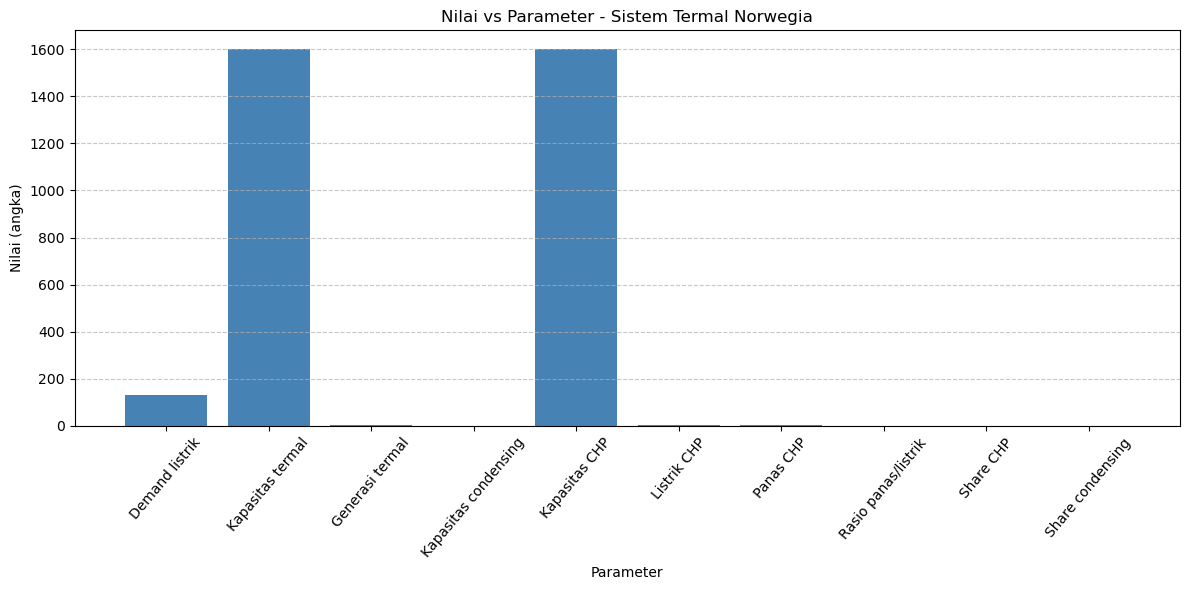

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# The CSV reading will be corrected in the previous cell (vlHIzuKGt0Q5)
# df = pd.read_csv("/content/Data_Sistem_Norwegia.csv") # This line is now redundant

# Bersihkan kolom 'Nilai + Satuan'
df['Nilai_cleaned'] = (
    df['Nilai + Satuan']
    .astype(str)
    .str.replace(r'[^\d,.-]', '', regex=True)  # buang karakter non angka/koma/titik/minus
    .str.replace('.', '', regex=False)         # buang titik ribuan
    .str.replace(',', '.', regex=False)        # ganti koma jadi titik
)

# Fungsi untuk parsing nilai (termasuk rentang)
def parse_value(x):
    if '-' in x:  # kalau berupa rentang, ambil rata-rata
        parts = x.split('-')
        try:
            return (float(parts[0]) + float(parts[1])) / 2
        except:
            return None
    try:
        return float(x)
    except:
        return None

df['Nilai_cleaned'] = df['Nilai_cleaned'].apply(parse_value)

# Hapus baris kosong supaya bisa diplot
df_cleaned = df.dropna(subset=['Nilai_cleaned']).copy()

# Plot grafik
plt.figure(figsize=(12, 6))
plt.bar(df_cleaned['Parameter'], df_cleaned['Nilai_cleaned'], color='steelblue')

plt.title('Nilai vs Parameter - Sistem Termal Norwegia')
plt.xlabel('Parameter')
plt.ylabel('Nilai (angka)')
plt.xticks(rotation=50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [30]:
pd.read_csv('D:\LKTI\Folder Baru\Permintaan_dan_Produksi_Nasional.csv', sep=';')

,No,Parameter,Nilai + Satuan,Keterangan
0,1,Total permintaan listrik,"305,12 TWh",Data tahun 2023 dari RUPTL PLN
1,2,Kapasitas pembangkit terpasang,± 81.000 MW,Termasuk semua jenis pembangkit
2,3,Kapasitas pembangkit termal,± 51.000 MW,Mayoritas PLTU batubara dan PLTG
3,4,Kontribusi termal ke listrik,"± 210,00 TWh",Sekitar 68–70% dari bauran pembangkitan
4,5,Kontribusi EBT (renewables),± 14–15 %,"PLTA, PLTS, PLTB, biomassa, panas bumi"
5,6,Target EBT 2025,23 %,Dalam dokumen RUEN dan Kebijakan Energi Nasional


In [35]:
import pandas as pd

df = pd.read_csv('D:\LKTI\Folder Baru\Permintaan_dan_Produksi_Nasional.csv', sep=';')
print(df.columns)
df.head()

Index(['No', 'Parameter', 'Nilai + Satuan', 'Keterangan'], dtype='object')


,No,Parameter,Nilai + Satuan,Keterangan
0,1,Total permintaan listrik,"305,12 TWh",Data tahun 2023 dari RUPTL PLN
1,2,Kapasitas pembangkit terpasang,± 81.000 MW,Termasuk semua jenis pembangkit
2,3,Kapasitas pembangkit termal,± 51.000 MW,Mayoritas PLTU batubara dan PLTG
3,4,Kontribusi termal ke listrik,"± 210,00 TWh",Sekitar 68–70% dari bauran pembangkitan
4,5,Kontribusi EBT (renewables),± 14–15 %,"PLTA, PLTS, PLTB, biomassa, panas bumi"


In [36]:
print(df.columns)
df.head()

Index(['No', 'Parameter', 'Nilai + Satuan', 'Keterangan'], dtype='object')


,No,Parameter,Nilai + Satuan,Keterangan
0,1,Total permintaan listrik,"305,12 TWh",Data tahun 2023 dari RUPTL PLN
1,2,Kapasitas pembangkit terpasang,± 81.000 MW,Termasuk semua jenis pembangkit
2,3,Kapasitas pembangkit termal,± 51.000 MW,Mayoritas PLTU batubara dan PLTG
3,4,Kontribusi termal ke listrik,"± 210,00 TWh",Sekitar 68–70% dari bauran pembangkitan
4,5,Kontribusi EBT (renewables),± 14–15 %,"PLTA, PLTS, PLTB, biomassa, panas bumi"


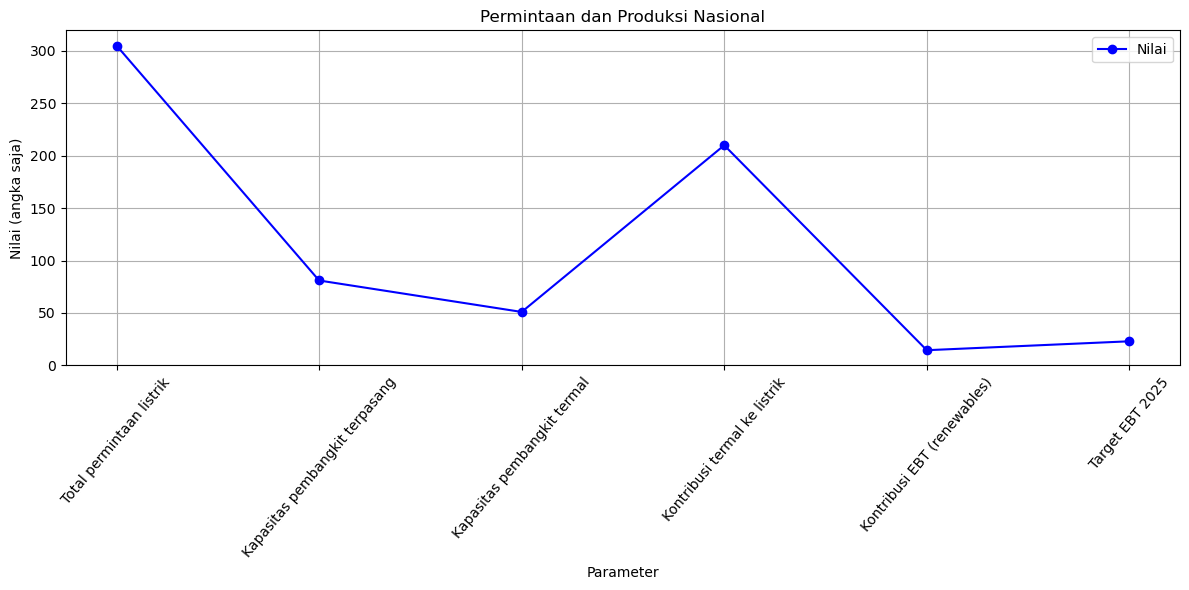

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Bersihkan kolom 'Nilai + Satuan'
df['Nilai_cleaned'] = (
    df['Nilai + Satuan']
    .astype(str)
    .str.replace(r'[^\d,.–]', '', regex=True)   # buang semua huruf & simbol selain angka, koma, titik, minus, en-dash
    .str.replace(',', '.', regex=False)         # ganti koma dengan titik desimal
    .str.replace('–', '-', regex=False)         # ganti en-dash dengan minus
)

# Ambil angka rata-rata jika berupa rentang (contoh: '14-15')
def parse_value(x):
    if '-' in x:
        parts = x.split('-')
        try:
            return (float(parts[0]) + float(parts[1])) / 2
        except:
            return None
    try:
        return float(x)
    except:
        return None

df['Nilai_cleaned'] = df['Nilai_cleaned'].apply(parse_value)

# Drop NaN supaya bisa diplot
df_cleaned = df.dropna(subset=['Nilai_cleaned']).copy()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Parameter'], df_cleaned['Nilai_cleaned'], marker='o', color='blue', label='Nilai')

# Judul dan Label
plt.title('Permintaan dan Produksi Nasional')
plt.xlabel('Parameter')
plt.ylabel('Nilai (angka saja)')
plt.xticks(rotation=50)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
